In [1]:
import matplotlib.pyplot as plt
import LightPipes as lp
import numpy as np

from focal_spot_pattern import create_gaussian_mask
from propagation import fraunhofer_propagation
from scipy.ndimage import gaussian_filter

## Simple case - beam passing through square aperture

In [166]:
# known case from LightPipes

lambda_ = 2.75e-10
grid_dimension = 750

w = 25e-6
z = 25

grid_size = 500e-6

In [167]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.RectAperture(2*w, 2*w, 0, F_in)

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)
E_in[X<=-w] = 0 +0j
E_in[X>=w] = 0 +0j
E_in[Y<=-w] = 0 +0j
E_in[Y>=w] = 0 +0j

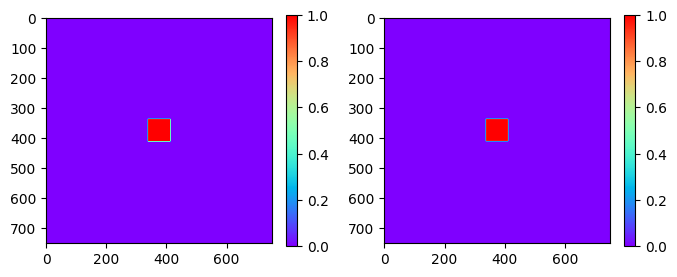

In [168]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [176]:
F_out = lp.Forvard(F_in, z)
E_out, start, end = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension, padding_factor=10)

In [177]:
def I_theoretical(x,y,w,lambda_,z):
    return 16*w**4/(lambda_**2*z**2)*np.sinc(2*w*x/(lambda_*z))**2*np.sinc(2*w*y/(lambda_*z))**2

I_plot = I_theoretical(X, Y, w, lambda_, z)

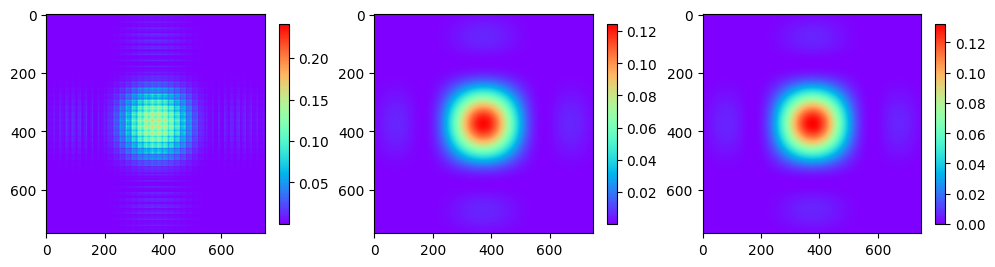

In [178]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out[start:end,start:end])**2, cmap='rainbow')
im3=ax[2].imshow(I_plot, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im3, ax=ax[2], shrink=0.65)

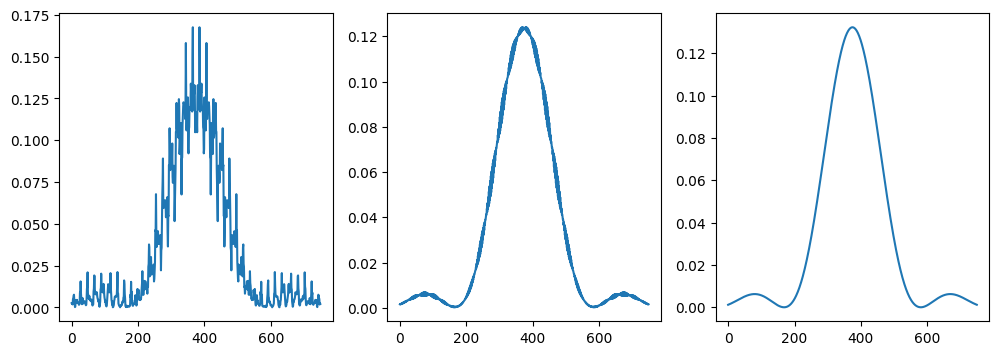

In [179]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)][start:end])**2)
ax[2].plot(I_plot[int(len(I_plot)/2)])

In [180]:
def E_theoretical(x,y,w,lambda_,z):
    k = 2*np.pi/lambda_
    return np.exp(1j*k*z)*np.exp(1j*k/(2*z)*(x**2+y**2))/(1j*lambda_*z)*4*w*w*np.sinc(2*w*x/(lambda_*z))*np.sinc(2*w*y/(lambda_*z))

E_plot = E_theoretical(X, Y, w, lambda_, z)

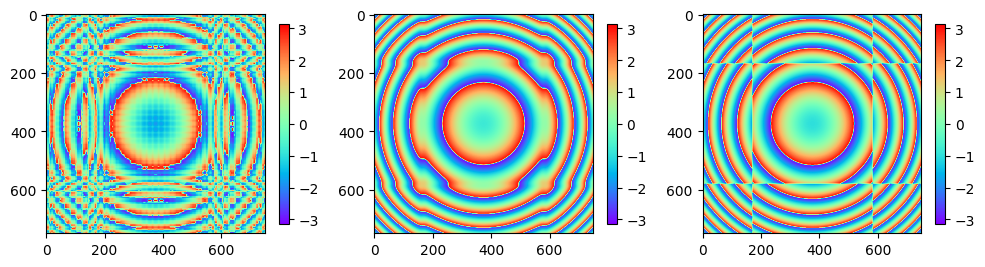

In [181]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out[start:end,start:end]), cmap='rainbow')
im2=ax[2].imshow(np.angle(E_plot), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im2, ax=ax[2], shrink=0.65)

In [182]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))

print("\nCustom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

print("\nTheoretical method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_plot)**2))

LightPipes comparison:
in = 5625.0 | out = 5624.999999999998

Custom method:
in = 5476.0 | out = 5475.9999999999945

Theoretical method:
in = 5476.0 | out = 5051.334385473708


## Simple case - beam passing through circle aperture

In [183]:
# known case from LightPipes

grid_size = 500e-6
lambda_ = 2.75e-10
grid_dimension = 500

w=30e-6
z=25

In [184]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.CircAperture(w, 0, 0, F_in)

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)
E_in[X**2 + Y**2 >= w**2] = 0 +0j

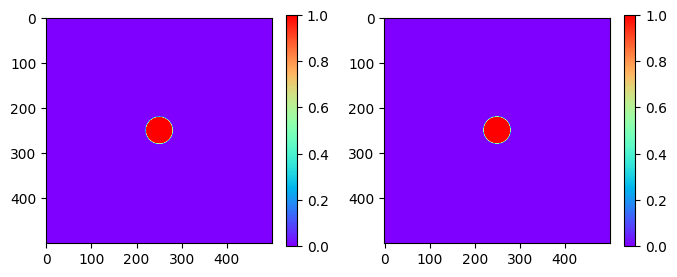

In [185]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [186]:
F_out = lp.Forvard(F_in, z)
E_out, start, end = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension, padding_factor=5)

In [187]:
from scipy.special import jv

def I_theoretical(x,y,w,lambda_,z):
    r = np.sqrt(x**2 + y**2)
    k = 2 * np.pi / lambda_
    A = np.pi * w * w

    return np.exp(1j * lambda_ * z) * np.exp(1j * k/(2*z) * r**2) * A/(1j * lambda_ * z) * (2*jv(1,k*w/z*r)/(k*w/z*r))

I_plot = I_theoretical(X, Y, w, lambda_, z)

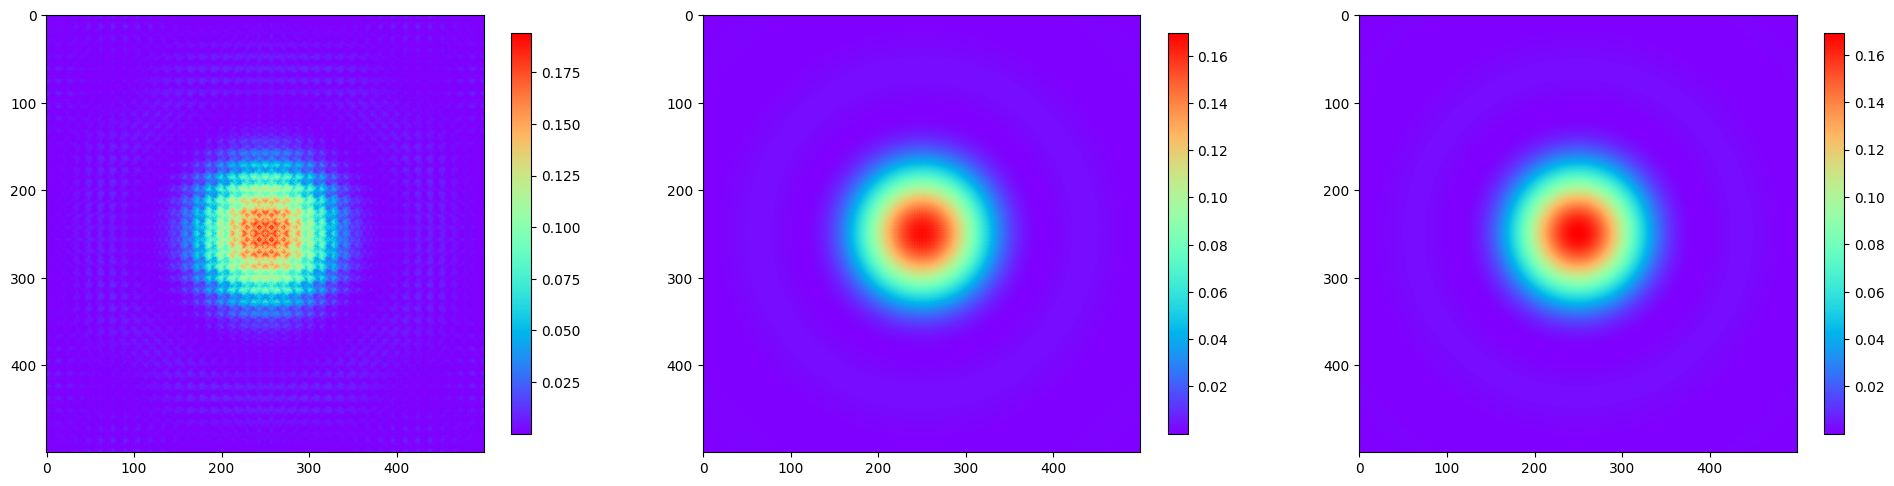

In [188]:
fig, ax = plt.subplots(ncols=3, figsize=(24,8))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out[start:end, start:end])**2, cmap='rainbow')
im3=ax[2].imshow(np.abs(I_plot)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im3, ax=ax[2], shrink=0.65)

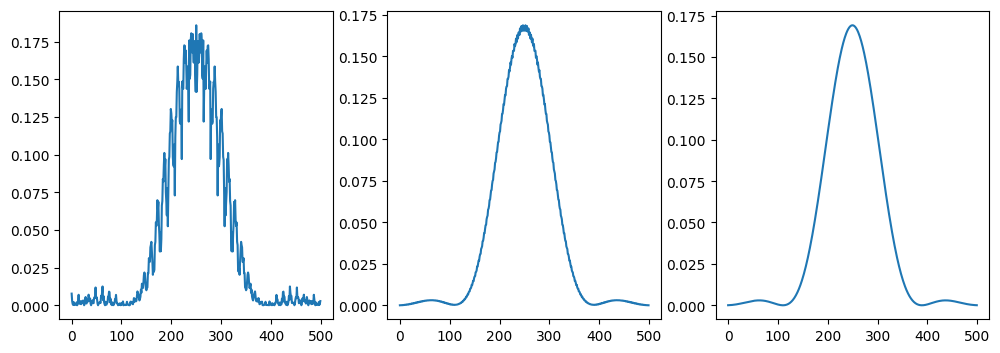

In [189]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)][start:end])**2)
ax[2].plot(np.abs(I_plot[int(len(I_plot)/2)])**2)

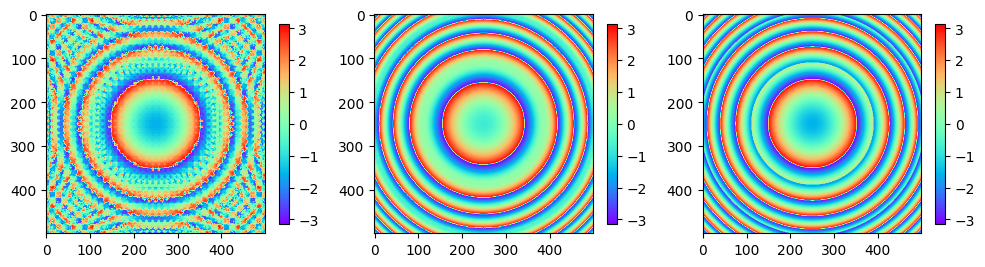

In [190]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out[start:end, start:end]), cmap='rainbow')
im2=ax[2].imshow(np.angle(I_plot), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im2, ax=ax[2], shrink=0.65)

In [191]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))

print("\nCustom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

print("\nTheoretical method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(I_plot)**2))

LightPipes comparison:
in = 2813.0 | out = 2813.0000000000014

Custom method:
in = 2828.0 | out = 2828.000000000002

Theoretical method:
in = 2828.0 | out = 2578.918889147933


## Simple case - sinusoidal amplitude grating

In [192]:
# known case from LightPipes

grid_size = 500e-6
lambda_ = 2.75e-10
grid_dimension = 500

w=25e-6
z=20
f0=50000

In [193]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.RectAperture(2*w, 2*w, 0, F_in)
F_in.field *= (1/2 + 1/2*np.cos(2*np.pi*f0*F_in.xvalues))

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)
E_in[X<=-w] = 0 +0j
E_in[X>=w] = 0 +0j
E_in[Y<=-w] = 0 +0j
E_in[Y>=w] = 0 +0j

E_in *= (1/2 + 1/2*np.cos(2*np.pi*f0*x))

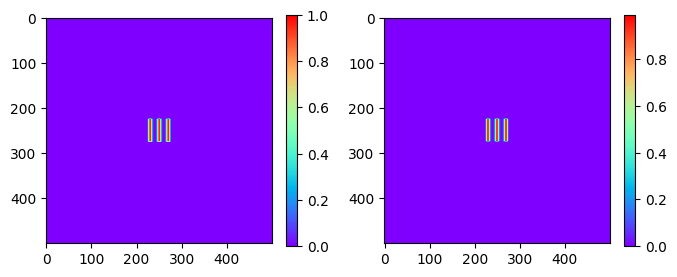

In [194]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [195]:
F_out = lp.Forvard(F_in, z)
E_out, start, end = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension, padding_factor=7)

In [196]:
def I_theoretical(x,y,w,lambda_,z):
    A = 2*w*2*w
    k = 2*np.pi/lambda_

    term1 = A/(1j*2*lambda_*z) * np.exp(1j*k*z) * np.exp(1j*k/(2*z)*(x**2+y**2)) * np.sinc(2*w*y/(lambda_*z))
    term2 = np.sinc(2*w*x/(lambda_*z))
    term3 = 1/2*np.sinc(2*w/(lambda_*z)*(x+f0*lambda_*z))
    term4 = 1/2*np.sinc(2*w/(lambda_*z)*(x-f0*lambda_*z))

    return term1 * (term2 + term3 + term4)

I_plot = I_theoretical(X, Y, w, lambda_, z)

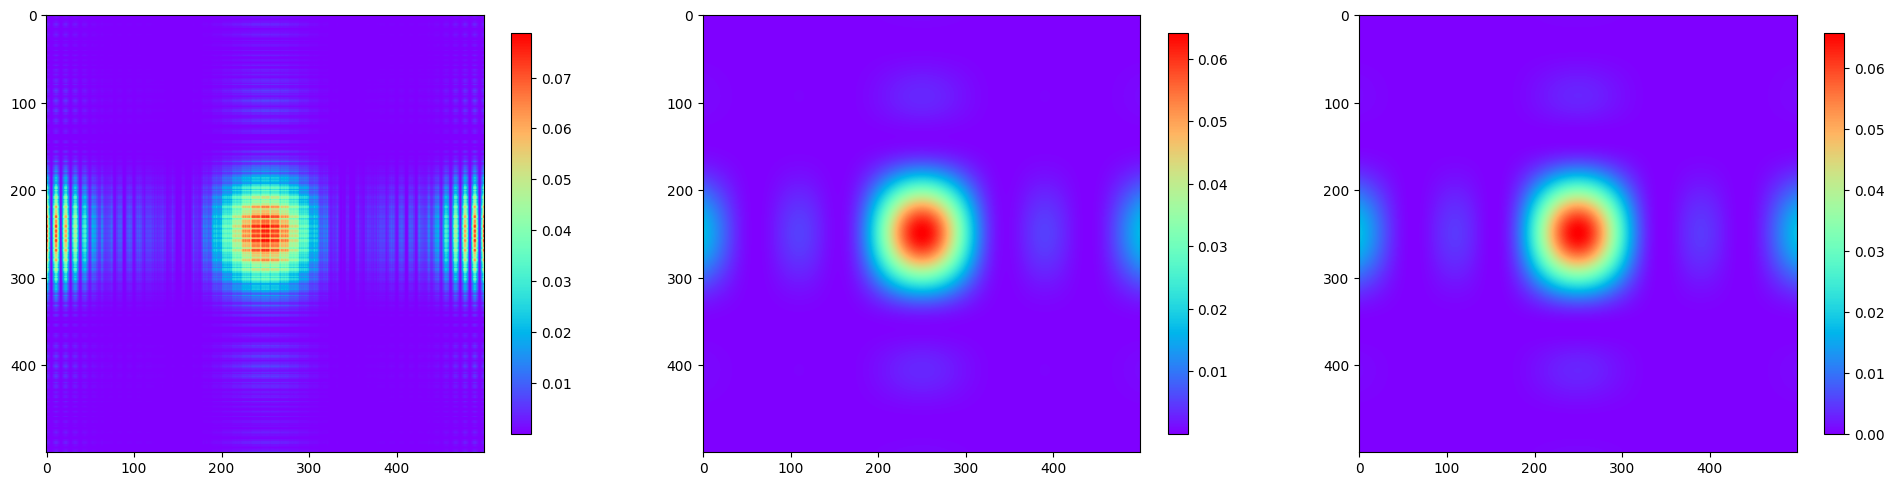

In [197]:
fig, ax = plt.subplots(ncols=3, figsize=(24,8))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out[start:end, start:end])**2, cmap='rainbow')
im3=ax[2].imshow(np.abs(I_plot)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im3, ax=ax[2], shrink=0.65)

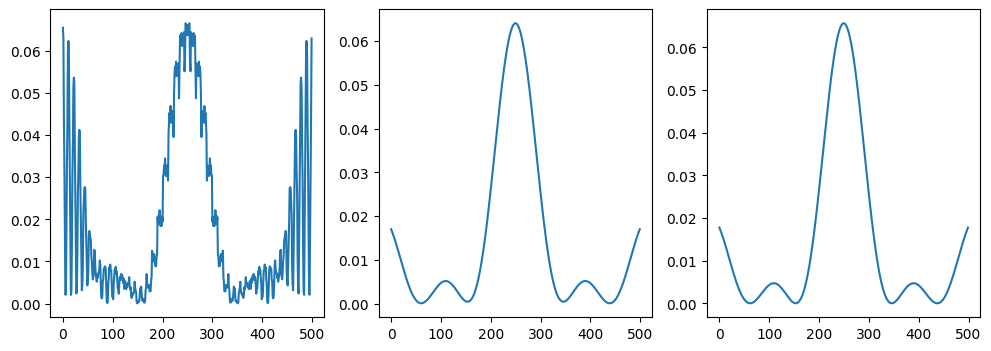

In [198]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)][start:end])**2)
ax[2].plot(np.abs(I_plot[int(len(I_plot)/2)])**2)

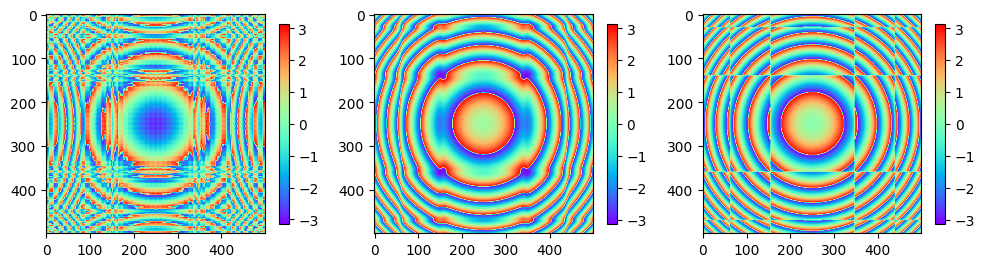

In [201]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out[start:end, start:end]), cmap='rainbow')
im2=ax[2].imshow(np.angle(I_plot), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im2, ax=ax[2], shrink=0.65)

In [202]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))

print("\nCustom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

print("\nTheoretical method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(I_plot)**2))

LightPipes comparison:
in = 1130.0006636242138 | out = 1130.000663624214

Custom method:
in = 1096.3392505733686 | out = 1096.3392505733677

Theoretical method:
in = 1096.3392505733686 | out = 752.0127548668305


## Simple case using a Gaussian beam

In [203]:
# known case from LightPipes

grid_size = 500e-6
lambda_ = 2.75e-10
grid_dimension = 400

w=25e-6
z=25

In [204]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.GaussAperture(F_in, w)

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = create_gaussian_mask(X, Y, diameter=2*w)

F_out = lp.Forvard(F_in, z)
E_out, start, end = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension)

C:\Users\joaooo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_arraypad_impl.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  padded[left_slice] = value_pair[0]
C:\Users\joaooo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_arraypad_impl.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
  padded[right_slice] = value_pair[1]


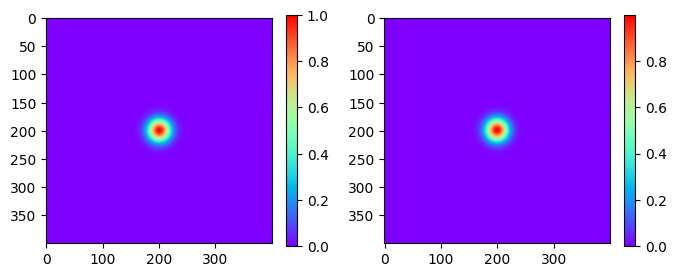

In [205]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

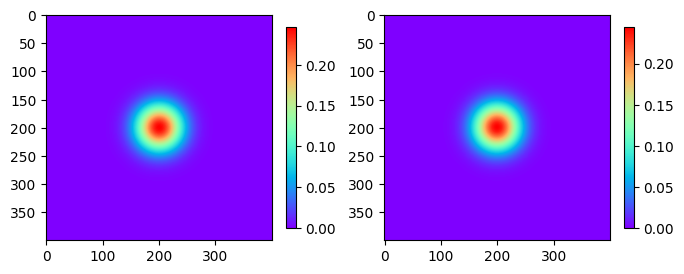

In [206]:
# intensity plots

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out[start:end, start:end])**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)

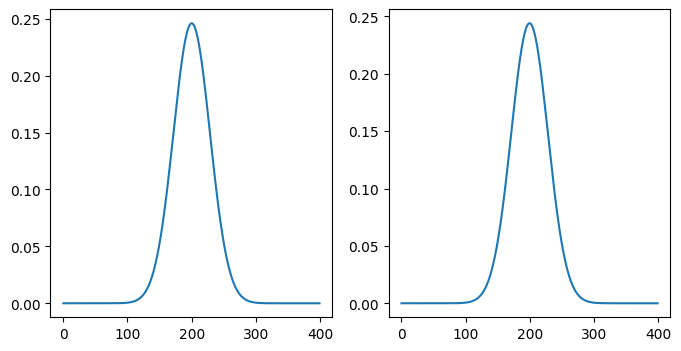

In [207]:
# cross section plots

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)][start:end])**2)

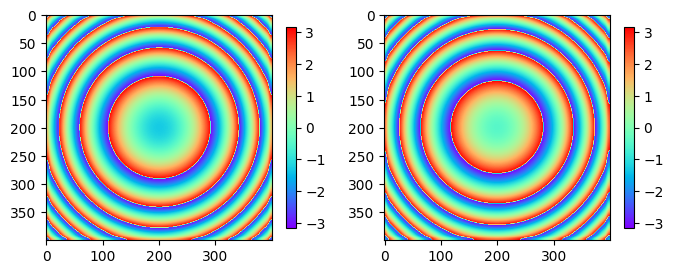

In [208]:
# intensity plots

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out[start:end, start:end]), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)

In [209]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))

print("\nCustom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

LightPipes comparison:
in = 1256.637061435917 | out = 1256.6370614359173

Custom method:
in = 1250.3617301103714 | out = 1250.3617301103723
